# Student Data
This notebook analyses pass and fail data for a class.

In [278]:
data =[50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64, 0, 0]
print(data)

[50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64, 0, 0]


In [279]:
import numpy as np
grades = np.array(data)
print(grades)

[50 50 47 97 49  3 53 42 26 74 82 62 37 15 70 27 36 35 48 52 63 64  0  0]


In [280]:
grades.shape

(24,)

In [281]:
grades.mean()

np.float64(45.083333333333336)

In [282]:
study_hours = [10, 11.5, 9, 16, 9.25, 1, 11.5, 9, 8.5, 14.5, 15.5, 13.75, 9, 8, 15.5, 8, 9, 6, 10, 12, 12.5, 12, 8, 0]
student_data = np.array([study_hours, grades])

In [283]:
student_data[1][0]

np.float64(50.0)

In [284]:
avg_study = student_data[0].mean()
avg_grade = student_data[1].mean()
print(f'Average Study Time: {avg_study}\nAverage Grade: {avg_grade}')

Average Study Time: 9.979166666666666
Average Grade: 45.083333333333336


In [285]:
import pandas as pd
df_students = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda',
 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny', 'Jakeem', 'Helena', 'Ismat', 'Anila', 'Skye', 'Daniel',
 'Aisha', 'Bill', 'Ted'], 'StudyHours': student_data[0], 'Grade': student_data[1]})
print(df_students)

         Name  StudyHours  Grade
0         Dan       10.00   50.0
1       Joann       11.50   50.0
2       Pedro        9.00   47.0
3       Rosie       16.00   97.0
4       Ethan        9.25   49.0
5       Vicky        1.00    3.0
6    Frederic       11.50   53.0
7      Jimmie        9.00   42.0
8      Rhonda        8.50   26.0
9    Giovanni       14.50   74.0
10  Francesca       15.50   82.0
11      Rajab       13.75   62.0
12    Naiyana        9.00   37.0
13       Kian        8.00   15.0
14      Jenny       15.50   70.0
15     Jakeem        8.00   27.0
16     Helena        9.00   36.0
17      Ismat        6.00   35.0
18      Anila       10.00   48.0
19       Skye       12.00   52.0
20     Daniel       12.50   63.0
21      Aisha       12.00   64.0
22       Bill        8.00    0.0
23        Ted        0.00    0.0


In [286]:
df_students[df_students.Name=="Dan"]

,Name,StudyHours,Grade
0,Dan,10.0,50.0


In [287]:
url = "https://raw.githubusercontent.com/M1nza/Jupyter-Learn/refs/heads/main/grades.csv"
df_students = pd.read_csv(url)

In [288]:
df_students

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


In [289]:
df_students.isnull().sum()

Name          0
StudyHours    1
Grade         2
dtype: int64

In [291]:
df_students = df_students.dropna(axis=0)

In [292]:
mean_study = df_students['StudyHours'].mean()
mean_grade = df_students.Grade.mean()
print('Average weekly study hours: {:.2f}\nAverage grade: {:.2f}'.format(mean_study,mean_grade))

Average weekly study hours: 10.52
Average grade: 49.18


In [293]:
df_students[df_students.StudyHours > mean_study].Grade.mean()

np.float64(66.7)

In [294]:
passed = pd.Series(df_students.Grade >= 50)
df_students = pd.concat([df_students, passed.rename('Passed')], axis=1)

In [295]:
print(df_students.columns)

Index(['Name', 'StudyHours', 'Grade', 'Passed'], dtype='object')


In [296]:
df_students = df_students.loc[:, ~df_students.columns.duplicated()]

In [297]:
df_students.groupby(df_students.Passed).Name.count()

Passed
False    11
True     11
Name: Name, dtype: int64

In [298]:
df_students.groupby("Passed")[["StudyHours", "Grade"]].mean()

,StudyHours,Grade
Passed,,
False,7.886364,33.181818
True,13.159091,65.181818


In [299]:
df_students = df_students.sort_values('Grade')

C:\Users\minza\AppData\Local\Temp\ipykernel_67120\2522703599.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(df_students.Name, rotation=90)
C:\Users\minza\AppData\Local\Temp\ipykernel_67120\2522703599.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


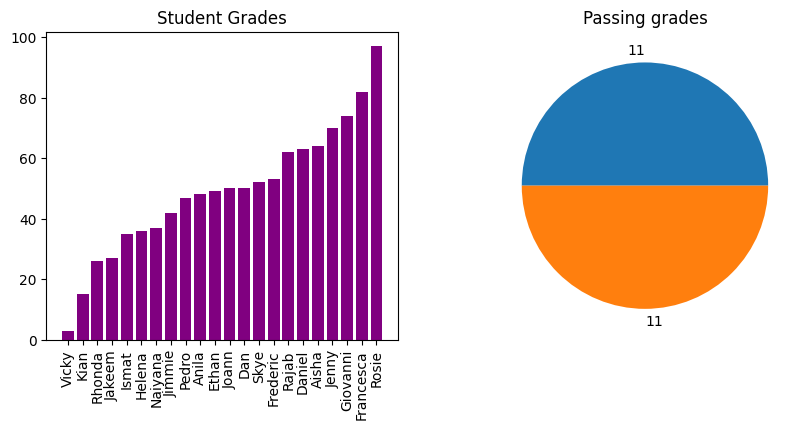

In [301]:
from matplotlib import pyplot as plt
fig, ax= plt.subplots(1, 2, figsize=(10, 4))
ax[0].bar(x=df_students.Name, height=df_students.Grade, color="Purple")
ax[0].set_title("Student Grades")
ax[0].set_xticklabels(df_students.Name, rotation=90)
passes_count = df_students.Passed.value_counts()
ax[1].pie(passes_count, labels=passes_count)
ax[1].set_title("Passing grades")
fig.show()

<Axes: xlabel='Name'>

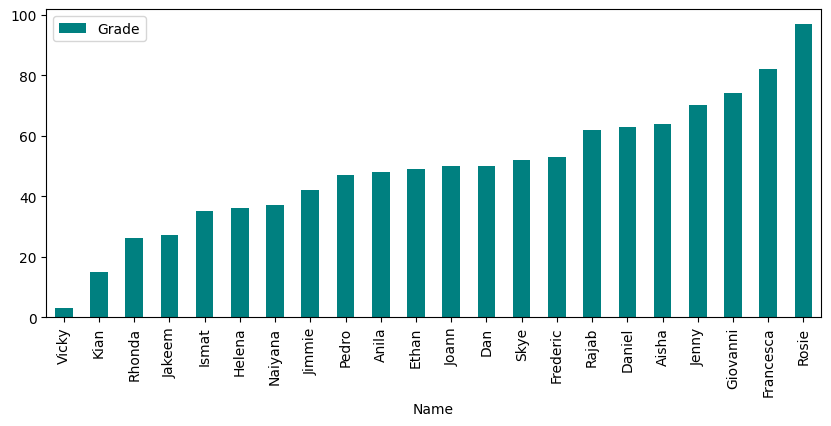

In [302]:
df_students.plot.bar(x='Name', y='Grade', figsize=(10, 4), color='Teal')

Minimum: 3.0
Maximum: 97.0
Mean: 49.18181818181818
Median: 49.5
Mode: 50.0


<bound method Figure.show of <Figure size 1000x400 with 1 Axes>>

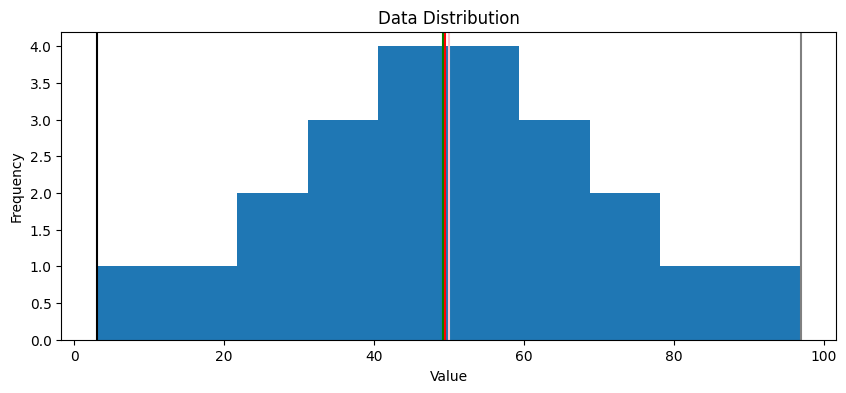

In [303]:
grades = df_students.Grade

min_val = df_students.Grade.min()
max_val = df_students.Grade.max()
mean_val = df_students.Grade.mean()
med_val = df_students.Grade.median()
mode_val = df_students.Grade.mode()[0]
print(f'Minimum: {min_val}\nMaximum: {max_val}\nMean: {mean_val}\nMedian: {med_val}\nMode: {mode_val}')


fig = plt.figure(figsize=(10, 4))
plt.hist(grades)
plt.axvline(x=min_val, color="black")
plt.axvline(x=max_val, color="Grey")
plt.axvline(x=mean_val, color="Green")
plt.axvline(x=med_val, color="Red")
plt.axvline(x=mode_val, color="Pink")

plt.title("Data Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
fig.show

C:\Users\minza\AppData\Local\Temp\ipykernel_67120\935270383.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


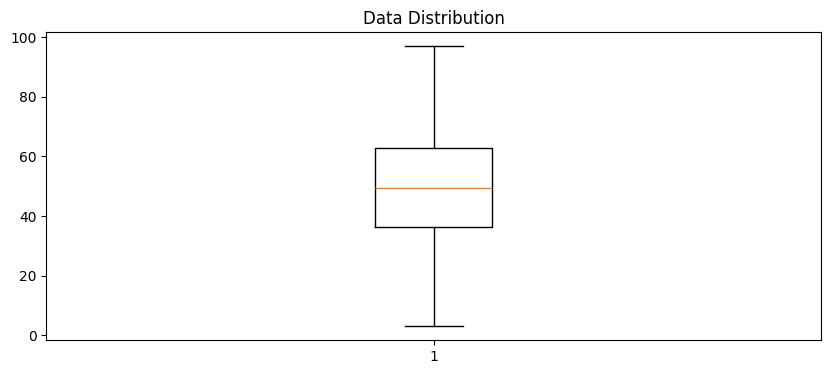

In [304]:
grades = df_students["Grade"]
fig = plt.figure(figsize=(10, 4))
plt.boxplot(grades)
plt.title("Data Distribution")
fig.show()


Minimum: 3.0
Maximum: 97.0
Mean: 49.18181818181818
Median: 49.5
Mode: 50.0


C:\Users\minza\AppData\Local\Temp\ipykernel_67120\185166908.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


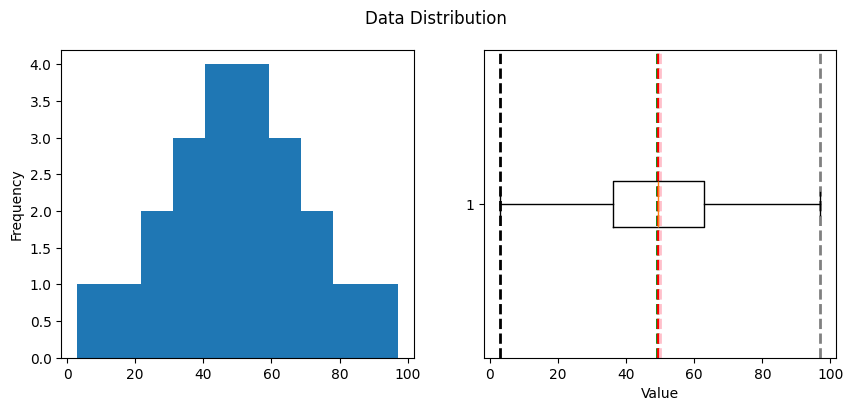

In [305]:
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    min_val = df_students.Grade.min()
    max_val = df_students.Grade.max()
    mean_val = df_students.Grade.mean()
    med_val = df_students.Grade.median()
    mode_val = df_students.Grade.mode()[0]
    
    print(f'Minimum: {min_val}\nMaximum: {max_val}\nMean: {mean_val}\nMedian: {med_val}\nMode: {mode_val}')

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    ax[0].hist(var_data)
    ax[0].set_ylabel("Frequency")
    plt.axvline(x=min_val, color="black", linestyle='dashed', linewidth=2)
    plt.axvline(x=max_val, color="Grey", linestyle='dashed', linewidth=2)
    plt.axvline(x=mean_val, color="Green", linestyle='dashed', linewidth=2)
    plt.axvline(x=med_val, color="Red", linestyle='dashed', linewidth=2)
    plt.axvline(x=mode_val, color="Pink", linestyle='dashed', linewidth=2)

    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')
    fig.suptitle("Data Distribution")
    fig.show()

col = df_students['Grade']
show_distribution(col)


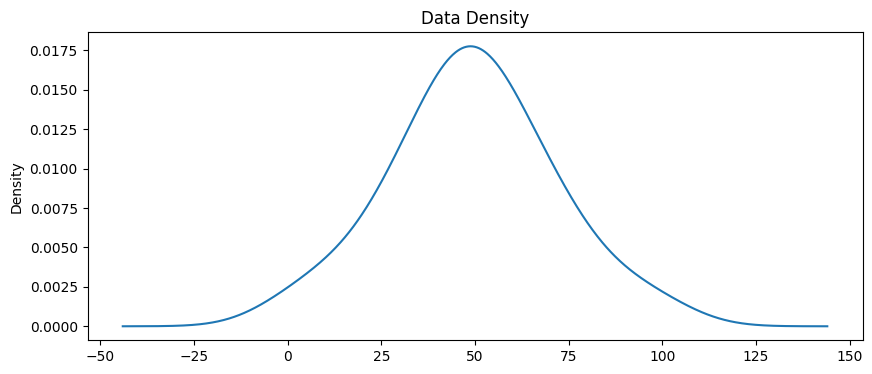

In [306]:
def show_density(data): 
    fig = plt.figure(figsize=(10, 4)) 
    data.plot.density() 
    plt.title('Data Density') 
    plt.show() 
show_density(df_students.Grade)

Minimum: 3.0
Maximum: 97.0
Mean: 49.18181818181818
Median: 49.5
Mode: 50.0


C:\Users\minza\AppData\Local\Temp\ipykernel_67120\185166908.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


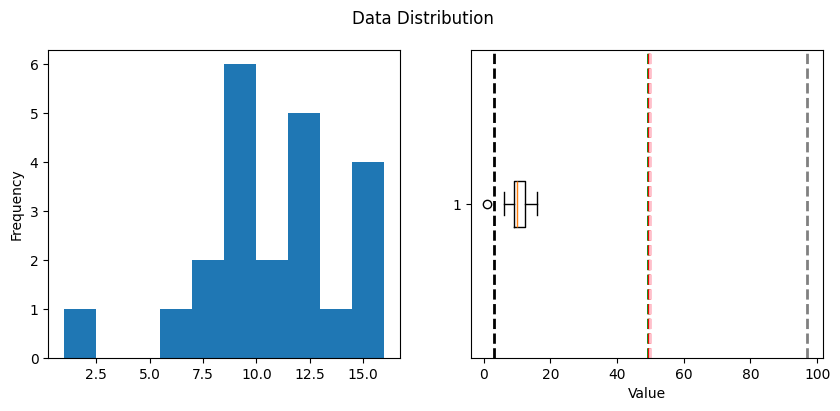

In [308]:
show_distribution(df_students.StudyHours)

Minimum: 3.0
Maximum: 97.0
Mean: 49.18181818181818
Median: 49.5
Mode: 50.0


C:\Users\minza\AppData\Local\Temp\ipykernel_67120\185166908.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


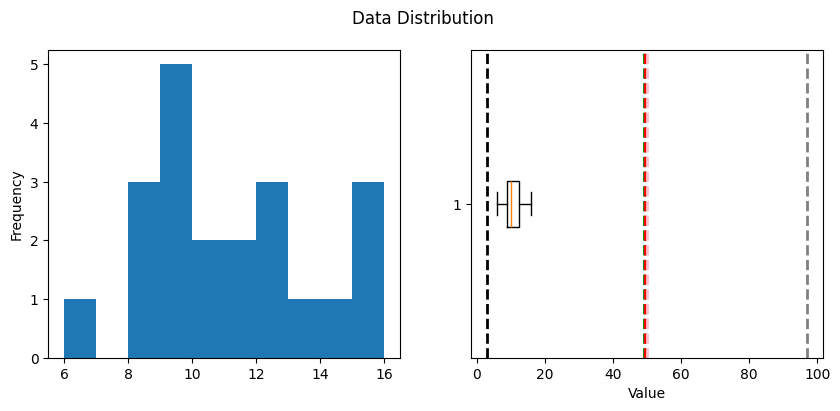

In [311]:
col = df_students[df_students.StudyHours>1]['StudyHours']
show_distribution(col)

In [312]:
import math
mean = df_students.StudyHours.mean()
variance = 0
for hours in df_students.StudyHours:
    variance = variance + ((mean - hours)**2)
variance = variance/df_students.shape[0]
variance
std = math.sqrt(variance)
std

3.4069690366260925

In [313]:
for col_name in ['Grade', 'StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print(f'\n{col_name}:\n - Range: {rng}\n - Variance: {var}\n - Std Dev: {std}')


Grade:
 - Range: 94.0
 - Variance: 472.53679653679654
 - Std Dev: 21.73791150356438

StudyHours:
 - Range: 15.0
 - Variance: 12.16017316017316
 - Std Dev: 3.4871439832867757


In [315]:
print(f'68% of grades will fall between:{df_students.Grade.mean() - df_students.Grade.std()} and {df_students.Grade.mean() + df_students.Grade.std()}')

68% of grades will fall between:27.4439066782538 and 70.91972968538256


In [316]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


In [317]:
df_sample = df_students[df_students.StudyHours>1]
df_sample

,Name,StudyHours,Grade,Passed
13,Kian,8.00,15.0,False
8,Rhonda,8.50,26.0,False
15,Jakeem,8.00,27.0,False
17,Ismat,6.00,35.0,False
16,Helena,9.00,36.0,False
12,Naiyana,9.00,37.0,False
7,Jimmie,9.00,42.0,False
2,Pedro,9.00,47.0,False
18,Anila,10.00,48.0,False
4,Ethan,9.25,49.0,False


<Axes: title={'center': 'StudyHours'}, xlabel='Passed'>

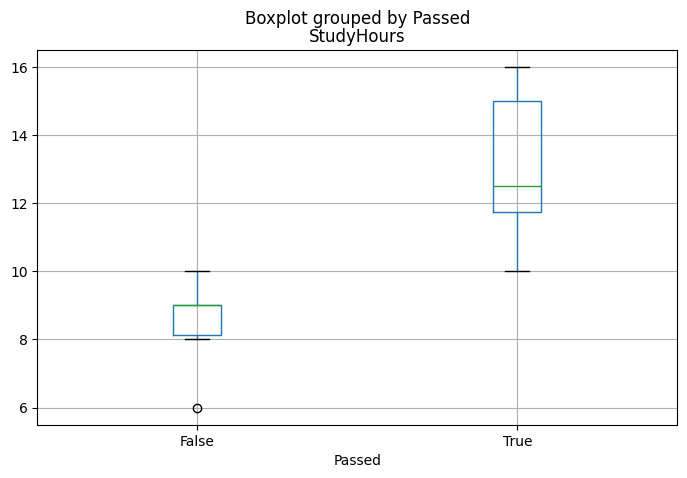

In [318]:
df_sample.boxplot(column='StudyHours', by='Passed', figsize=(8, 5))


<Axes: xlabel='Name'>

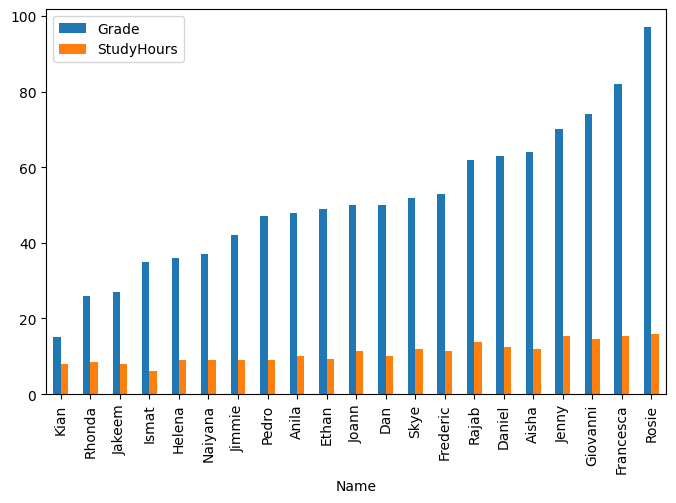

In [319]:
df_sample.plot(x='Name', y=['Grade', 'StudyHours'], kind='bar', figsize=(8, 5))


<Axes: xlabel='Name'>

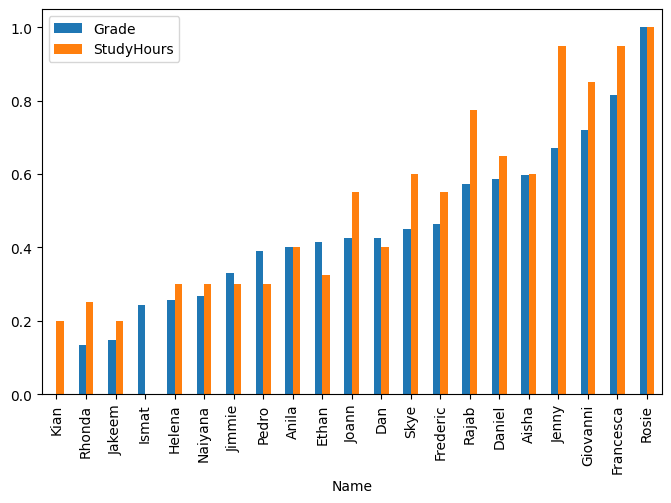

In [321]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()
df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade', 'StudyHours']])
df_normalized.plot(x='Name', y=['Grade', 'StudyHours'], kind='bar', figsize=(8, 5))

In [323]:
df_normalized.Grade.corr(df_normalized.StudyHours)

np.float64(0.9117666413789677)

<Axes: title={'center': 'Study Time VS Grade'}, xlabel='StudyHours', ylabel='Grade'>

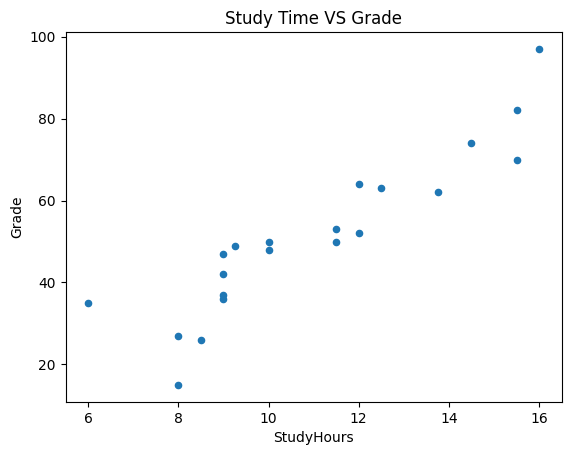

In [325]:
df_sample.plot.scatter(title='Study Time VS Grade', x='StudyHours', y='Grade')

y = mx + b
f(x)
error = y - f(x) ** 2

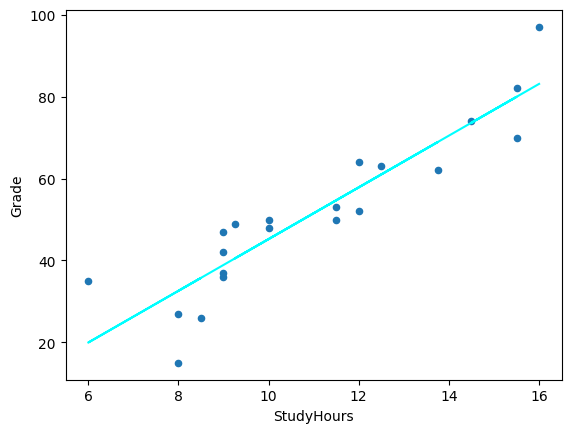

6.3134256337923595 -17.916409932816137


In [329]:
from scipy import stats
df_regression = df_sample[['Grade', 'StudyHours']].copy()
m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])
df_regression['fx'] = (m * df_regression['StudyHours']) + b
df_regression['error'] = df_regression['fx'] - df_regression['Grade']
df_regression.plot.scatter(x='StudyHours', y='Grade')
plt.plot(df_regression['StudyHours'], df_regression['fx'], color='cyan')
plt.show()
print(m, b)

In [331]:
def predict(x):
    m = 6.3134
    b = -17.9164
    return m*x + b
prediction = predict(20)
prediction

108.3516